In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df_merged=pd.read_csv('./archivos/dataset_merged.csv')
df_merged.head()

,userId,movieId,rating,title,overview,genres,vote_average
0,1,1371,2.5,Rocky III,"Now the world champion, Rocky Balboa is living...",['Drama'],6.6
1,4,1371,4.0,Rocky III,"Now the world champion, Rocky Balboa is living...",['Drama'],6.6
2,7,1371,3.0,Rocky III,"Now the world champion, Rocky Balboa is living...",['Drama'],6.6
3,19,1371,4.0,Rocky III,"Now the world champion, Rocky Balboa is living...",['Drama'],6.6
4,21,1371,3.0,Rocky III,"Now the world champion, Rocky Balboa is living...",['Drama'],6.6


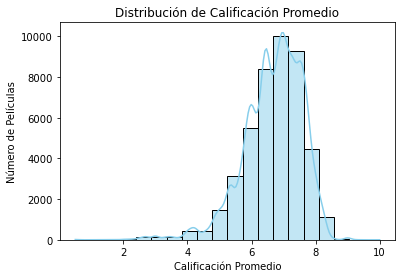


Estadísticas clave de Calificación Promedio:
count    44994.000000
mean         6.634178
std          1.059538
min          0.000000
25%          6.100000
50%          6.800000
75%          7.300000
max         10.000000
Name: vote_average, dtype: float64


In [3]:
df_eda=df_merged[df_merged['vote_average'] > 0].copy()

sns.histplot(df_eda['vote_average'], bins=20, kde=True, color='skyblue')
plt.title('Distribución de Calificación Promedio')
plt.xlabel('Calificación Promedio')
plt.ylabel('Número de Películas')
plt.show()

print("\nEstadísticas clave de Calificación Promedio:")
print(df_merged['vote_average'].describe())

- Distribucion normal
- Baja representacion en los extremos
- Sesgo positivo
- Mayor cantidad entre 6 y 7.5

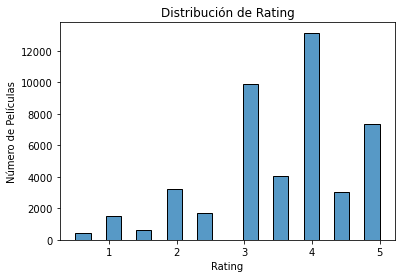


Estadísticas clave de Ratings:
count    44994.000000
mean         3.560986
std          1.053169
min          0.500000
25%          3.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: rating, dtype: float64


In [4]:
sns.histplot(data=df_merged, x='rating',bins=20)
plt.title('Distribución de Rating')
plt.xlabel('Rating')
plt.ylabel('Número de Películas')
plt.show()

print("\nEstadísticas clave de Ratings:")
print(df_merged['rating'].describe())

- Sesgo positivo
- se agrupan en valores altos
- mayoría de las calificaciones son positiva

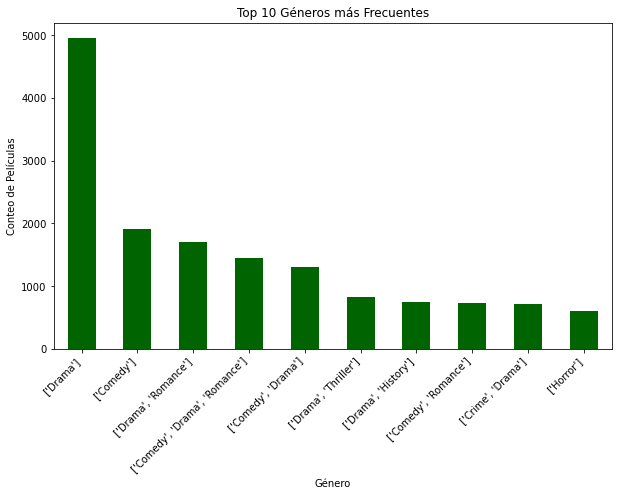

In [5]:
# Convertir la lista de géneros en filas separadas
s = df_merged.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
df_genre = df_merged.drop('genres', axis=1).join(s)

# Conteo de los 10 géneros más frecuentes
top_genres = df_genre['genre'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_genres.plot(kind='bar', color='darkgreen')
plt.title('Top 10 Géneros más Frecuentes')
plt.xlabel('Género')
plt.ylabel('Conteo de Películas')
plt.xticks(rotation=45, ha='right')
plt.show()

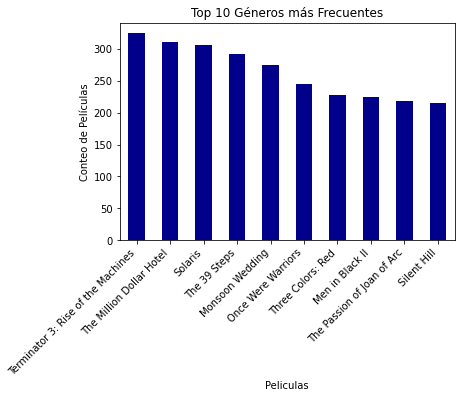

In [6]:

# Conteo de los 10 géneros más frecuentes
top_movies = df_merged['title'].value_counts().head(10)

top_movies.plot(kind='bar', color='darkblue')
plt.title('Top 10 Géneros más Frecuentes')
plt.xlabel('Peliculas')
plt.ylabel('Conteo de Películas')
plt.xticks(rotation=45, ha='right')
plt.show()

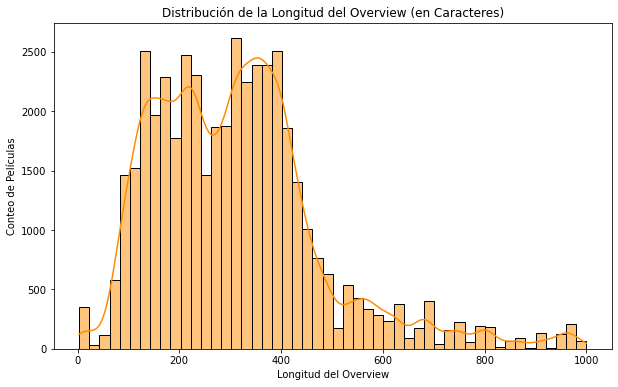


Estadísticas de Longitud de Overview (caracteres):
count    44994.000000
mean       313.606059
std        168.949552
min          3.000000
25%        189.000000
50%        302.000000
75%        395.000000
max       1000.000000
Name: overview_length, dtype: float64


In [7]:
# Calculamos la longitud del overview (número de caracteres)
df_merged['overview_length'] = df_merged['overview'].astype(str).apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df_merged[df_merged['overview_length'] > 0]['overview_length'], bins=50, kde=True, color='darkorange')
plt.title('Distribución de la Longitud del Overview (en Caracteres)')
plt.xlabel('Longitud del Overview')
plt.ylabel('Conteo de Películas')
plt.show()

print("\nEstadísticas de Longitud de Overview (caracteres):")
print(df_merged[df_merged['overview_length'] > 0]['overview_length'].describe())

- Naturaleza Bimodal
- Asimetría a la Derecha
- La mayoría de texto tiene más de 100 caracteres
- suficiente información semántica (para usar embeddings)

In [8]:
total_users = df_merged['userId'].nunique()
total_items = df_merged['movieId'].nunique()
total_ratings = len(df_merged)

total_cells = total_users * total_items

# Esparcidad y Densidad
sparsity = 1 - (total_ratings / total_cells)
density = 1 - sparsity

# --- 3. Resultados ---
print("ANÁLISIS DE SPARSITY (Ratings)")
print(f"Total de Usuarios (Filas): {total_users:,}")
print(f"Total de Ítems/Películas (Columnas): {total_items:,}")
print(f"Número Total de Ratings (Interacciones): {total_ratings:,}")
print("---------------------------------------")

print(f"Esparcidad (Sparsity - Celdas Vacías): {sparsity:.4f}%")

ANÁLISIS DE SPARSITY (Ratings)
Total de Usuarios (Filas): 671
Total de Ítems/Películas (Columnas): 2,830
Número Total de Ratings (Interacciones): 44,994
---------------------------------------
Esparcidad (Sparsity - Celdas Vacías): 0.9763%


- Esparcidad extremadamente alta